In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, accuracy_score
import joblib

X_emb = np.load("../../data/embeddings/embeddings.npy")
y = np.load("../../data/embeddings/labels.npy")

le = joblib.load("../../data/embeddings/label_encoder.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_emb, y, test_size=0.2, random_state=42)


In [6]:
X_test.shape

(12688, 384)

In [16]:
from sklearn.cluster import KMeans

num_clusters = 22 

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_emb)

KMeans(n_clusters=22, random_state=42)

In [31]:
silhouette_score(X_emb, kmeans.labels_)

np.float32(0.011352313)

In [9]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.617749054224464

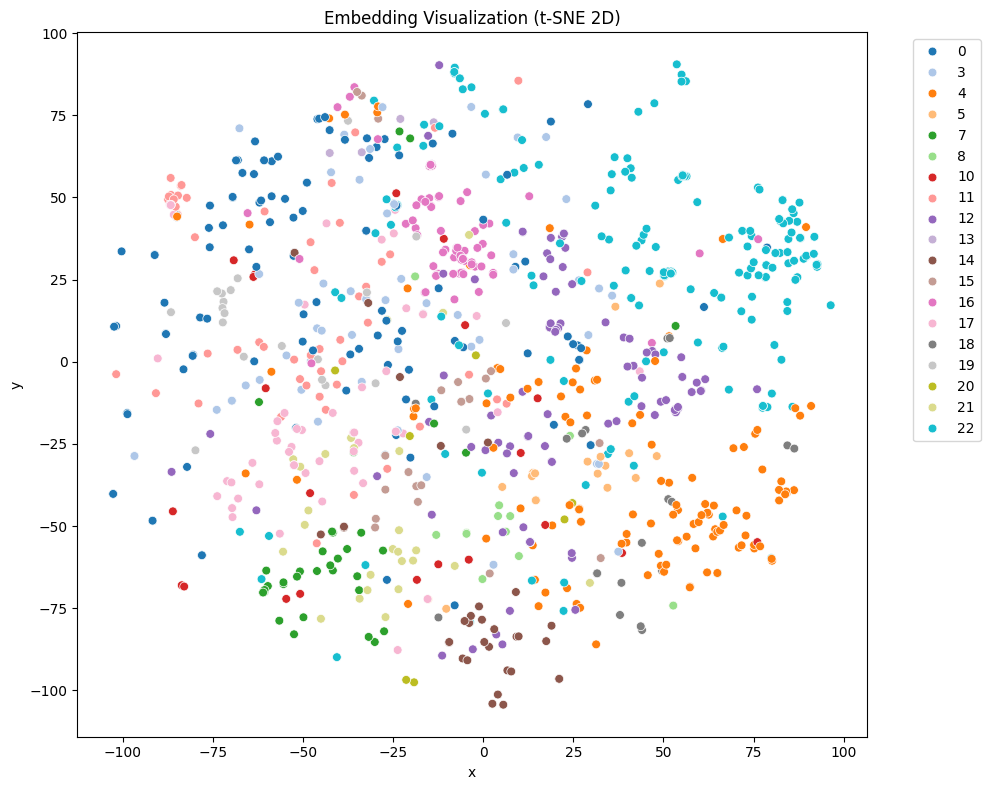

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_emb)

import pandas as pd

df_plot = pd.DataFrame({
    'x': X_2d[:1000, 0],
    'y': X_2d[:1000, 1],
    'label': y[:1000]  # có thể thay bằng tên lớp
})

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='x', y='y', hue='label', palette='tab20', s=40)
plt.title('Embedding Visualization (t-SNE 2D)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.617749054224464

In [ ]:
kmeans.fit(X_2d)
silhouette_score(y.reshape(-1, 1), kmeans.labels_)

np.float64(-0.370868281663412)

Explained variance ratio: [0.03730537 0.02507721]


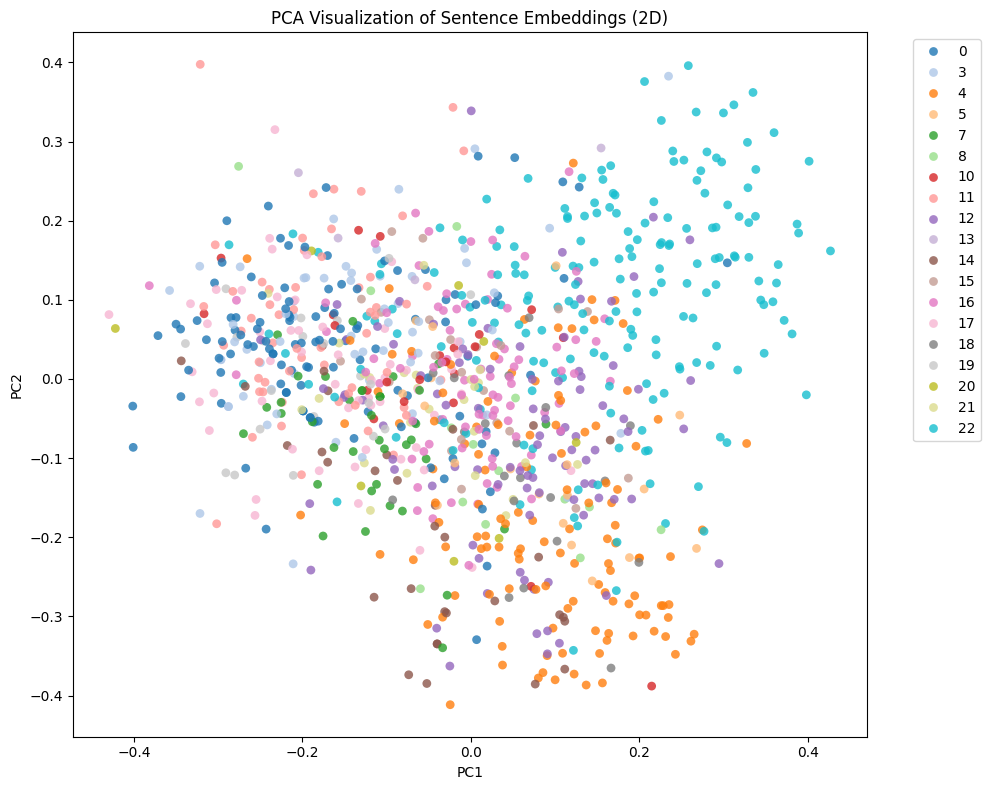

In [14]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_emb)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


# Tạo DataFrame để plot
df_pca = pd.DataFrame({
    'PC1': X_pca[:1000, 0],
    'PC2': X_pca[:1000, 1],
    'Label': y[:1000]  # Có thể là tên lớp hoặc số lớp
})

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Label', palette='tab20', s=40, linewidth=0, alpha=0.8)
plt.title('PCA Visualization of Sentence Embeddings (2D)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:

kmeans.fit(X_pca)
silhouette_score(y.reshape(-1, 1), kmeans.labels_)